In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import scipy.stats

%pylab inline




Populating the interactive namespace from numpy and matplotlib


In [2]:
def getCitiBikeCSV(datestring):
    '''Downloads citibike data and unzips it. If the data is downloaded by not unzippeds it zips it. Moves the data to $PUIDATA
    Arguments:
        date string as yyyymm
    '''
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
datestring1 = '201505'
datestring2 = '201506'

In [4]:
getCitiBikeCSV(datestring1)

getCitiBikeCSV(datestring2)

file in place, you can continue
file in place, you can continue


In [5]:
df1 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring1 + '-citibike-tripdata.csv')
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring2 + '-citibike-tripdata.csv')

df = df1.append(df2)



In [10]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,415,5/1/2015 00:00:11,5/1/2015 00:07:06,477,W 41 St & 8 Ave,40.756405,-73.990026,442,W 27 St & 7 Ave,40.746647,-73.993915,17012,Subscriber,1981.0,1
1,1523,5/1/2015 00:00:28,5/1/2015 00:25:52,293,Lafayette St & E 8 St,40.730287,-73.990765,324,DeKalb Ave & Hudson Ave,40.689888,-73.981013,17390,Customer,NaN,0
2,642,5/1/2015 00:00:52,5/1/2015 00:11:35,380,W 4 St & 7 Ave S,40.734011,-74.002939,507,E 25 St & 2 Ave,40.739126,-73.979738,15003,Subscriber,1990.0,1
3,367,5/1/2015 00:00:48,5/1/2015 00:06:55,537,Lexington Ave & E 24 St,40.740259,-73.984092,280,E 10 St & 5 Ave,40.733320,-73.995101,14788,Subscriber,1978.0,1
4,2734,5/1/2015 00:00:51,5/1/2015 00:46:26,426,West St & Chambers St,40.717548,-74.013221,327,Vesey Pl & River Terrace,40.715338,-74.016584,21068,Subscriber,1956.0,2


In [6]:
df['time'] = pd.to_datetime(df.starttime)

In [7]:
df['hour'] = df.time.dt.hour

In [8]:
def is_day(x):
    if x >= 7 and x <= 19:
        return 1
    else:
        return 0

In [9]:
df['day'] = df.hour.apply(is_day)
df['night'] = 1- df['day']

In [10]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,time,hour,day,night
0,415,5/1/2015 00:00:11,5/1/2015 00:07:06,477,W 41 St & 8 Ave,40.756405,-73.990026,442,W 27 St & 7 Ave,40.746647,-73.993915,17012,Subscriber,1981.0,1,2015-05-01 00:00:11,0,0,1
1,1523,5/1/2015 00:00:28,5/1/2015 00:25:52,293,Lafayette St & E 8 St,40.730287,-73.990765,324,DeKalb Ave & Hudson Ave,40.689888,-73.981013,17390,Customer,NaN,0,2015-05-01 00:00:28,0,0,1
2,642,5/1/2015 00:00:52,5/1/2015 00:11:35,380,W 4 St & 7 Ave S,40.734011,-74.002939,507,E 25 St & 2 Ave,40.739126,-73.979738,15003,Subscriber,1990.0,1,2015-05-01 00:00:52,0,0,1
3,367,5/1/2015 00:00:48,5/1/2015 00:06:55,537,Lexington Ave & E 24 St,40.740259,-73.984092,280,E 10 St & 5 Ave,40.733320,-73.995101,14788,Subscriber,1978.0,1,2015-05-01 00:00:48,0,0,1
4,2734,5/1/2015 00:00:51,5/1/2015 00:46:26,426,West St & Chambers St,40.717548,-74.013221,327,Vesey Pl & River Terrace,40.715338,-74.016584,21068,Subscriber,1956.0,2,2015-05-01 00:00:51,0,0,1


H0: The tripduration of daytime riders and nighttime riders come from the same distribution <br>
H1: The tripduration of daytime riders and nighttime riders come from different distributions

In [11]:
ks = scipy.stats.ks_2samp(df.tripduration[df.day == 0], df.tripduration[df.day == 1])

In [12]:
ks

Ks_2sampResult(statistic=0.04512738267302107, pvalue=0.0)

Since the pvalue is low it means that we cannot say that the tripduration of day and night bikers come from the same distribution

In [13]:
daytrips = df.tripduration[df.day == 1].as_matrix()
nighttrips = df.tripduration[df.day == 0].as_matrix()

In [ ]:
np.seed(4)

In [14]:
n_daytrips = np.random.choice(daytrips, len(nighttrips), replace=False)

In [15]:
n_daytrips

array([278, 569, 819, ..., 552, 333, 436])

In [16]:
n_daytrips = sorted(n_daytrips)

In [17]:
n_nighttrips = sorted(nighttrips)

In [18]:
print(len(n_daytrips), len(n_nighttrips))

312735 312735


H0: The tripdurations of day and night riders are uncorrelated <br>
H1: The tripdurations of day and night riders are correlated

In [19]:
pear = scipy.stats.pearsonr(n_daytrips, n_nighttrips)

In [20]:
pear

(0.98091259222886096, 0.0)

Since the pvalue is low we reject that null hypothesis that the ridership is uncorrelated

H0: The tripdurations of day and night riders are uncorrelated <br>
H1: The tripdurations of day and night riders are correlated

In [84]:
scipy.stats.pearsonr(n_daytrips, n_daytrips)

(1.0, 0.0)

In [21]:
spear = scipy.stats.spearmanr(n_daytrips, n_nighttrips)

In [86]:
spear

SpearmanrResult(correlation=0.99999940458909919, pvalue=0.0)

We reject the null hypothesis that the tripduration of day and night time riders are uncorrelated

In [28]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'time', u'hour', u'day',
       u'night'],
      dtype='object')

In [55]:
minlat = 40.702225
minlon = -74.032063
maxlon = -73.9901
maxlat = 40.717398

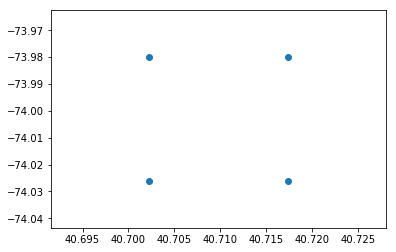

In [54]:
pl.scatter([40.702225, 40.702225, 40.717398, 40.717398], [-74.032063, -73.9801,-74.026063, -73.9801 ])

In [66]:
def get_boro(xy):
    y, x= xy
    if ((y > minlat) & (y < maxlat) & (x > minlon) & (x < maxlon)):
        return 'Manhattan'
    else:
        return 'Brooklyn'

In [68]:
df['Borough'] = df[['start station latitude', 'start station longitude']].apply(get_boro, axis=1)

In [69]:
df = df[df['birth year'].notnull()]

In [70]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,bikeid,usertype,birth year,gender,time,hour,day,night,Borough,age
0,415,5/1/2015 00:00:11,5/1/2015 00:07:06,477,W 41 St & 8 Ave,40.756405,-73.990026,442,W 27 St & 7 Ave,40.746647,...,17012,Subscriber,1981.0,1,2015-05-01 00:00:11,0,0,1,Brooklyn,34.0
2,642,5/1/2015 00:00:52,5/1/2015 00:11:35,380,W 4 St & 7 Ave S,40.734011,-74.002939,507,E 25 St & 2 Ave,40.739126,...,15003,Subscriber,1990.0,1,2015-05-01 00:00:52,0,0,1,Brooklyn,25.0
3,367,5/1/2015 00:00:48,5/1/2015 00:06:55,537,Lexington Ave & E 24 St,40.740259,-73.984092,280,E 10 St & 5 Ave,40.733320,...,14788,Subscriber,1978.0,1,2015-05-01 00:00:48,0,0,1,Brooklyn,37.0
4,2734,5/1/2015 00:00:51,5/1/2015 00:46:26,426,West St & Chambers St,40.717548,-74.013221,327,Vesey Pl & River Terrace,40.715338,...,21068,Subscriber,1956.0,2,2015-05-01 00:00:51,0,0,1,Brooklyn,59.0
5,359,5/1/2015 00:01:07,5/1/2015 00:07:07,439,E 4 St & 2 Ave,40.726281,-73.989780,302,Avenue D & E 3 St,40.720828,...,17406,Subscriber,1961.0,1,2015-05-01 00:01:07,0,0,1,Brooklyn,54.0


In [71]:
df['age'] = 2015 - df['birth year']

In [72]:
ks = scipy.stats.ks_2samp(df.age[df.Borough == 'Manhattan'], df.age[df.Borough == 'Brooklyn'])

H0: The age of riders from brooklyn and manhattan come from same distribution <br>
H1: The age of riders from booklyn and manhattan are from the different distributions

In [73]:
ks

Ks_2sampResult(statistic=0.040276185393407174, pvalue=1.6154750017137409e-201)

In [74]:
manhattan = df.age[df.Borough == 'Manhattan'].as_matrix()
brooklyn = df.age[df.Borough == 'Brooklyn'].as_matrix()

In [75]:
print(len(manhattan), len(brooklyn))

158225 1447036


In [63]:
new_brooklyn = np.random.choice(brooklyn, len(manhattan))

In [78]:
manhattan = sorted(manhattan)
new_brooklyn = sorted(new_brooklyn)

H0: age of riders in brooklyn and manhattan are uncorrelated <br>
H1: the age of riders of brooklyn and manhattan are correlated

In [79]:
pear2 = scipy.stats.pearsonr(manhattan, new_brooklyn)

In [80]:
pear2

(0.99798120059289019, 0.0)

We reject the null hypothesis that the age of brooklyn and manhattan riders are uncorrelated

H0: age of riders in brooklyn and manhattan are uncorrelated <br>
H1: the age of riders of brooklyn and manhattan are correlated

In [82]:
spear2 = scipy.stats.spearmanr(manhattan, new_brooklyn)

In [83]:
spear2

SpearmanrResult(correlation=0.99923681996404645, pvalue=0.0)

We reject the null hypothesis that the age of brooklyn and manhattan riders are uncorrelated